In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [65]:
data = pd.read_csv("NFLX.csv")



In [66]:
data["Close"] = pd.to_numeric(data.Close, errors = 'coerce')
data = data.dropna()
train_data = data.iloc[:,4:5].values



In [67]:
s = MinMaxScaler(feature_range=(0,1))
train_data = s.fit_transform(train_data)

In [68]:
x_train = []
y_train = []

for i in range(60,1009):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [69]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [70]:
model = Sequential()

model.add(LSTM(units=100,return_sequences= True,input_shape =  (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences= True))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss ='mean_squared_error')


In [71]:
hist = model.fit(x_train,y_train,epochs= 20 , batch_size= 32 , verbose= 2)

Epoch 1/20
30/30 - 50s - loss: 0.0819 - 50s/epoch - 2s/step
Epoch 2/20
30/30 - 10s - loss: 0.0614 - 10s/epoch - 336ms/step
Epoch 3/20
30/30 - 11s - loss: 0.0596 - 11s/epoch - 355ms/step
Epoch 4/20
30/30 - 10s - loss: 0.0589 - 10s/epoch - 342ms/step
Epoch 5/20
30/30 - 10s - loss: 0.0588 - 10s/epoch - 338ms/step
Epoch 6/20
30/30 - 10s - loss: 0.0573 - 10s/epoch - 339ms/step
Epoch 7/20
30/30 - 10s - loss: 0.0578 - 10s/epoch - 337ms/step
Epoch 8/20
30/30 - 10s - loss: 0.0574 - 10s/epoch - 332ms/step
Epoch 9/20
30/30 - 10s - loss: 0.0569 - 10s/epoch - 335ms/step
Epoch 10/20
30/30 - 10s - loss: 0.0569 - 10s/epoch - 337ms/step
Epoch 11/20
30/30 - 10s - loss: 0.0564 - 10s/epoch - 334ms/step
Epoch 12/20
30/30 - 10s - loss: 0.0569 - 10s/epoch - 334ms/step
Epoch 13/20
30/30 - 10s - loss: 0.0568 - 10s/epoch - 339ms/step
Epoch 14/20
30/30 - 10s - loss: 0.0560 - 10s/epoch - 334ms/step
Epoch 15/20
30/30 - 10s - loss: 0.0558 - 10s/epoch - 333ms/step
Epoch 16/20
30/30 - 10s - loss: 0.0559 - 10s/epoch -

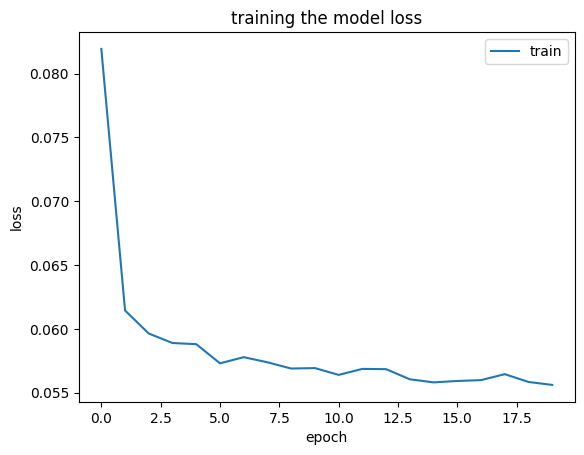

In [72]:
plt.plot(hist.history['loss'])
plt.title('training the model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper right')

plt.show()

In [73]:
test  = pd.read_csv("NETFLIX_monthly.csv")
test["Close"] = pd.to_numeric(test.Close,errors='coerce')
test = test.dropna()
test = test.iloc[:,4:5]
y = test.iloc[60:,0:].values

inputD  = test.iloc[:,0:].values
input_scaled = s.transform(inputD)
input_scaled.shape

x_test = []
length = len(test)
timestep  = 60
for i in range(timestep,length):
    x_test.append(input_scaled[i - timestep: i, 0])
x_test = np.array(x_test)
#x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1],1)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape


(195, 60, 1)

In [74]:
y = model.predict(x_test)
y

7/7 [==============================] - 8s 120ms/step


array([[[0.2809006 ],
        [0.376267  ],
        [0.41143322],
        ...,
        [0.38755086],
        [0.3875468 ],
        [0.38754275]],

       [[0.2809005 ],
        [0.3762668 ],
        [0.4114325 ],
        ...,
        [0.38754702],
        [0.38754287],
        [0.38753858]],

       [[0.28090048],
        [0.37626624],
        [0.41143155],
        ...,
        [0.3875431 ],
        [0.38753876],
        [0.38753384]],

       ...,

       [[0.28167608],
        [0.37818503],
        [0.41438594],
        ...,
        [0.39810327],
        [0.39725354],
        [0.3966914 ]],

       [[0.2815709 ],
        [0.37806842],
        [0.41432908],
        ...,
        [0.39725366],
        [0.39669153],
        [0.39653152]],

       [[0.28162992],
        [0.37817648],
        [0.4143104 ],
        ...,
        [0.39669165],
        [0.39653164],
        [0.39668754]]], dtype=float32)

In [75]:
y_pr = s.inverse_transform(y)

ValueError: Found array with dim 3. None expected <= 2.